# Bắt đầu

1. Định nghĩa vấn đề (Define Problem)

        Mô tả:

Bộ dữ liệu Pima Indians Diabetes được thu thập bởi National Institute of Diabetes and Digestive and Kidney Diseases.

Tập dữ liệu bao gồm thông tin y tế của 768 bệnh nhân nữ từ 21 tuổi trở lên, đều có nguồn gốc Pima Indian.

Mục tiêu của bài toán là dự đoán khả năng mắc bệnh tiểu đường của bệnh nhân dựa trên các thuộc tính y tế.

    Dữ liệu vào (Input Attributes):

Number of times pregnant (Số lần mang thai)

Plasma glucose concentration (Nồng độ glucose trong huyết tương sau 2 giờ)

Diastolic blood pressure (Huyết áp tâm trương - mm Hg)

Triceps skin fold thickness (Độ dày nếp gấp da cánh tay - mm)

2-Hour serum insulin (Insulin huyết thanh sau 2 giờ - mu U/ml)

Body mass index (Chỉ số BMI = cân nặng/chiều cao²)

Diabetes pedigree function (Chỉ số phả hệ tiểu đường)

Age (Tuổi - năm)

    Kết quả (Output / Class variable):

0 = Không mắc tiểu đường

1 = Mắc tiểu đường

##  Phân tích dữ liệu (Analyze Data)
#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [2]:
import pandas as pd

# Đọc dữ liệu
dab = pd.read_csv("diabetes.csv")

# Số dòng và số cột
print("Kích thước dữ liệu:", dab.shape)  

# Kiểu dữ liệu của từng cột
print("\nKiểu dữ liệu của từng cột:")
print(dab.dtypes)

# 5 dòng đầu
print("\n5 dòng đầu:")
print(dab.head())

# 5 dòng cuối
print("\n5 dòng cuối:")
print(dab.tail())

# Thông tin chung về dữ liệu
print("\nThông tin tổng quan:")
print(dab.info())


Kích thước dữ liệu: (768, 9)

Kiểu dữ liệu của từng cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 dòng đầu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672

Nhận xét: 

Kích thước dữ liệu: tổng cộng 768 mẫu (rows), số cột 9 thuộc tính (features).Kiểu dữ liệu: gồm 7 cột số nguyên (int64) và 2 cột số thực (float64), toàn bộ dữ liệu đều là dạng số học. Dữ liệu thiếu: một số cột như Glucose, BloodPressure, SkinThickness, Insulin, BMI có nhiều giá trị bằng 0, thực chất đây là dữ liệu thiếu chứ không phải giá trị hợp lệ.
Ý nghĩa cột: Pregnancies (số lần mang thai), Glucose (nồng độ glucose), BloodPressure (huyết áp tâm trương), SkinThickness (độ dày da), Insulin (nồng độ insulin), BMI (chỉ số khối cơ thể), DiabetesPedigreeFunction (chỉ số di truyền), Age (tuổi), Outcome (0 = không mắc, 1 = mắc tiểu đường).Đặc điểm: Outcome là biến mục tiêu dạng nhị phân, dữ liệu phân loại có thể mất cân bằng nên cần kiểm tra thêm.

### Kiểm tra dữ liệu có bị thiếu và các thống kê cơ bản 

In [3]:
# --- Kiểm tra dữ liệu thiếu ---
print("Số lượng giá trị thiếu (missing values) ở mỗi cột:")
print(dab.isnull().sum())

# --- Thống kê mô tả cơ bản ---
print("\nThống kê mô tả cơ bản:")
print(dab.describe())


Số lượng giá trị thiếu (missing values) ở mỗi cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Thống kê mô tả cơ bản:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000    

Nhận xét:

Dữ liệu không có missing values theo thống kê nhưng nhiều cột có giá trị bằng 0 bất thường (Glucose, BloodPressure, SkinThickness, Insulin, BMI) cho thấy thực chất đây là giá trị thiếu cần xử lý; giá trị trung bình Glucose ~121 và BMI ~32 phản ánh tình trạng thừa cân/tiền tiểu đường khá rõ; phân phối Outcome mất cân bằng (chỉ ~35% mẫu dương tính tiểu đường); một số thuộc tính có min=0 nhưng max rất cao (ví dụ Insulin max=846) chứng tỏ có nhiều outliers cần xem xét

### 2. Kiểm tra sự tương quan của từng thuộc tính

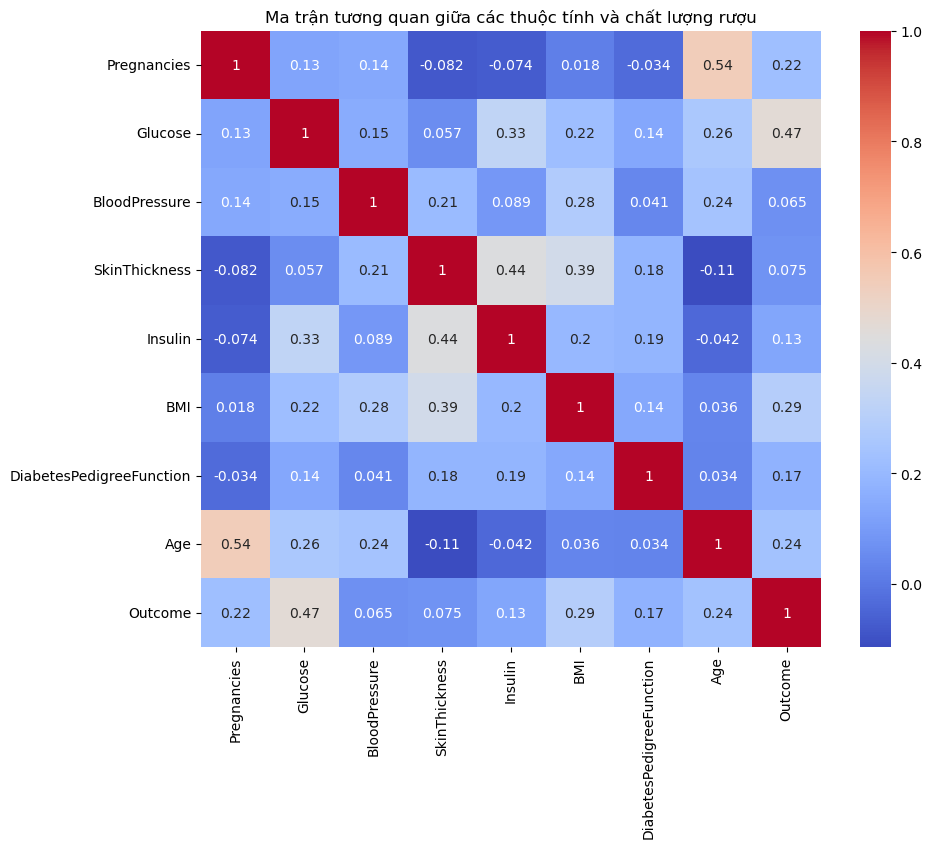

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = dab.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các thuộc tính và chất lượng rượu")
plt.show()


Nhận xét:

Ma trận tương quan cho thấy Outcome có mối quan hệ mạnh nhất với Glucose (0.47), tiếp theo là BMI (0.29), Age (0.24) và Pregnancies (0.22), trong khi các thuộc tính khác có tương quan rất thấp; Pregnancies và Age có tương quan cao (0.54), Insulin và SkinThickness có tương quan đáng kể (0.44), cho thấy có khả năng dư thừa thông tin; nhìn chung các đặc trưng không quá đa cộng tuyến, nhưng nên ưu tiên các đặc trưng Glucose, BMI, Age, Pregnancies cho việc dự đoán Outcome.

### Sử dụng Univariate Feature Selection để chọn các đặc trưng quan trong 

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Tách X và y
X = dab.drop("Outcome", axis=1)
y = dab["Outcome"]

# Chọn ra 4 thuộc tính quan trọng nhất
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)

# In ra tên cột được chọn
selected_features = X.columns[selector.get_support()]
print("Các thuộc tính chọn:", selected_features.tolist())

Các thuộc tính chọn: ['Pregnancies', 'Glucose', 'BMI', 'Age']


### Chuẩn bị dữ liệu cho trực quan hóa

In [7]:
import pandas as pd

# Đọc dữ liệu
diabetes_data = pd.read_csv("diabetes.csv")

# Giữ lại các cột quan trọng
diabetes_data = diabetes_data[['Pregnancies','Glucose','BMI','Age','Outcome']]

# Xem trước dữ liệu
print(diabetes_data.head())


   Pregnancies  Glucose   BMI  Age  Outcome
0            6      148  33.6   50        1
1            1       85  26.6   31        0
2            8      183  23.3   32        1
3            1       89  28.1   21        0
4            0      137  43.1   33        1


### Trực quan hóa với Matplotlib

2. Trực quan hóa với Matplotlib

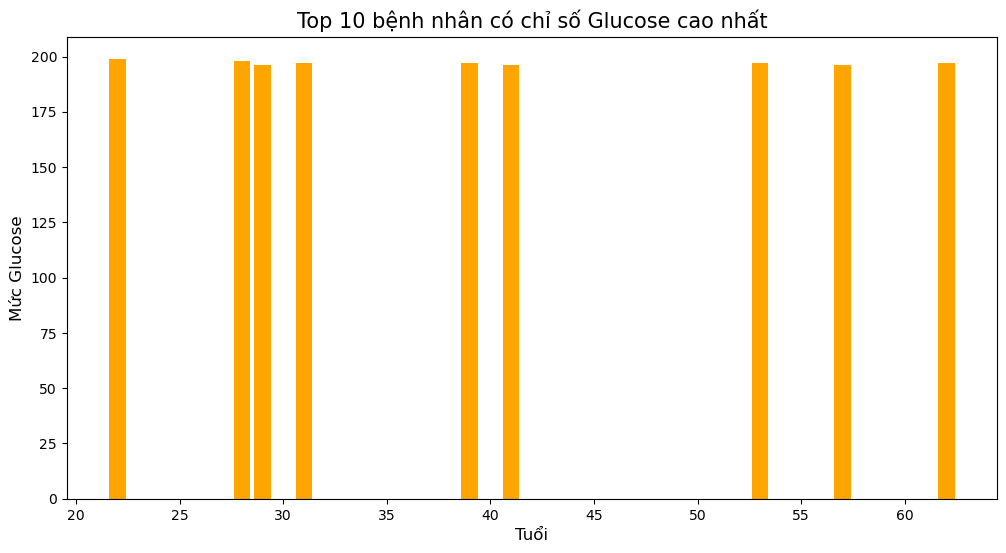

In [8]:
import matplotlib.pyplot as plt

# Sắp xếp theo Glucose giảm dần
diabetes_sorted = diabetes_data.sort_values('Glucose', ascending=False)

# Vẽ bar chart
plt.figure(figsize=(12,6))
x = diabetes_sorted['Age'][0:10]
y = diabetes_sorted['Glucose'][0:10]
plt.bar(x, y, color="orange")

plt.title('Top 10 bệnh nhân có chỉ số Glucose cao nhất', fontsize=15)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Mức Glucose', fontsize=12)
plt.show()


Nhận xét:

Biểu đồ cho thấy 10 bệnh nhân có chỉ số Glucose cao nhất đều đạt mức gần 200, phân bố chủ yếu trong độ tuổi từ 20 đến hơn 60, trong đó tập trung nhiều ở nhóm tuổi 28–32 và 53–62, điều này cho thấy chỉ số Glucose cao không chỉ xảy ra ở một độ tuổi nhất định mà xuất hiện ở nhiều lứa tuổi khác nhau.

Case 2: So sánh song song Glucose và BMI của 10 bệnh nhân

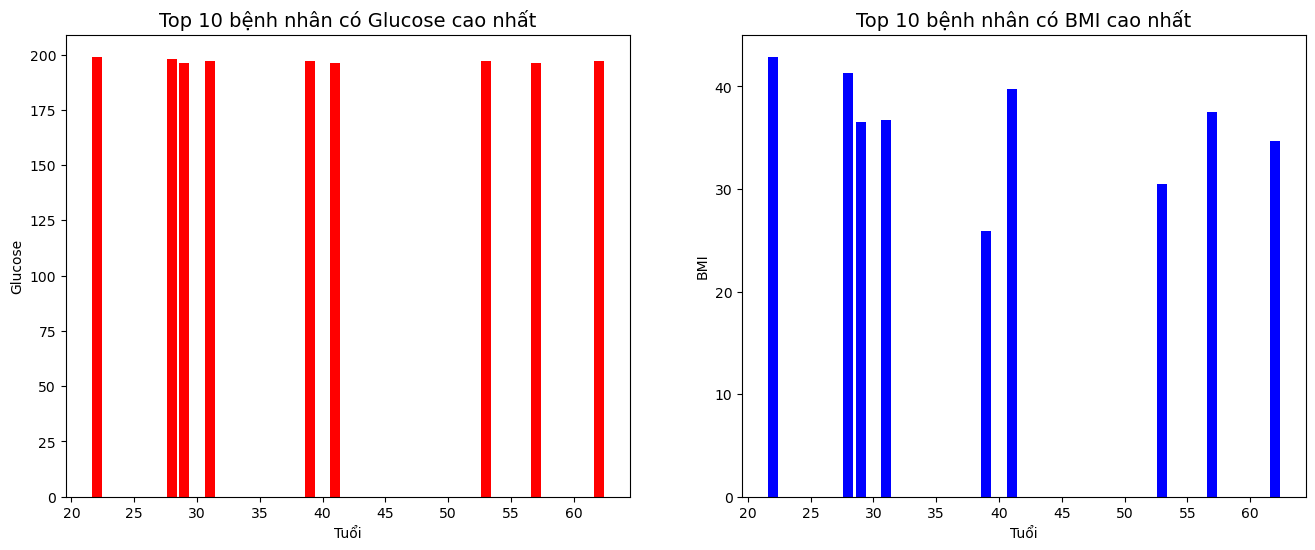

In [9]:
# Vẽ 2 subplot song song
fig, ax = plt.subplots(1,2, figsize=(16,6))

x = diabetes_sorted['Age'][0:10]
y1 = diabetes_sorted['Glucose'][0:10]
y2 = diabetes_sorted['BMI'][0:10]

# Glucose
ax[0].bar(x, y1, color="red")
ax[0].set_title("Top 10 bệnh nhân có Glucose cao nhất", fontsize=14)
ax[0].set_xlabel("Tuổi")
ax[0].set_ylabel("Glucose")

# BMI
ax[1].bar(x, y2, color="blue")
ax[1].set_title("Top 10 bệnh nhân có BMI cao nhất", fontsize=14)
ax[1].set_xlabel("Tuổi")
ax[1].set_ylabel("BMI")

plt.show()


Nhận xét:

Biểu đồ bên trái: top 10 bệnh nhân có Glucose cao nhất tập trung chủ yếu ở mức gần 200 mg/dL, độ tuổi trải đều từ khoảng 21 đến 62 tuổi, không có xu hướng rõ ràng theo tuổi; Biểu đồ bên phải: top 10 bệnh nhân có BMI cao nhất dao động từ khoảng 26 đến 43, độ tuổi trải rộng từ khoảng 22 đến 62 tuổi, có một vài bệnh nhân trẻ nhưng BMI vẫn cao.

## Trực quan hóa với Seaborn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Age', y='Glucose', palette="Set2")


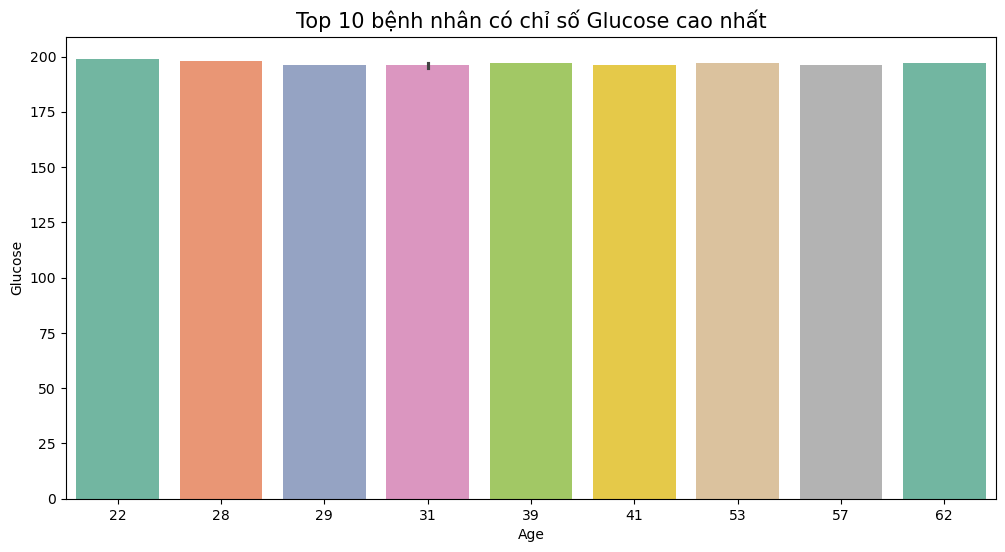

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data, palette="Set1")


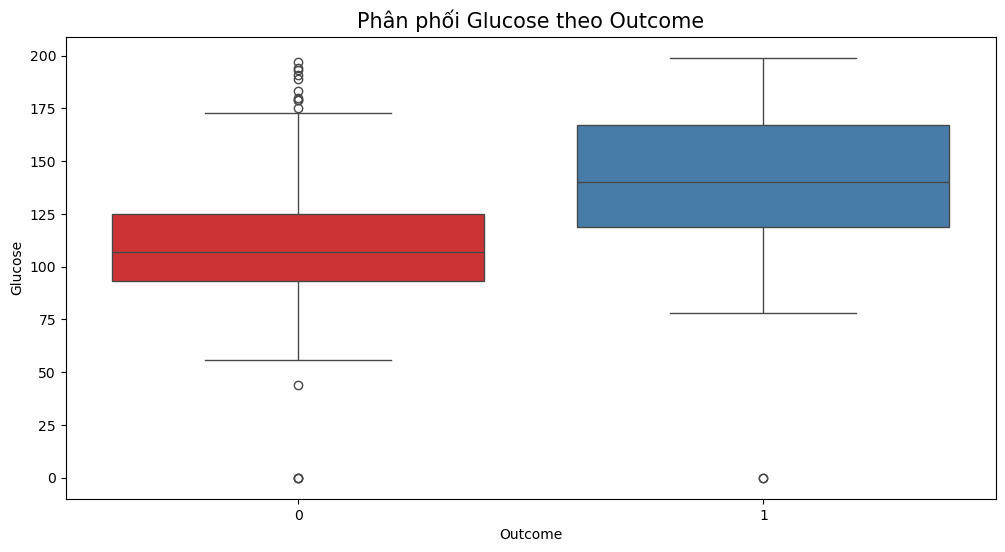

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BMI", data=diabetes_data, palette="Set3")


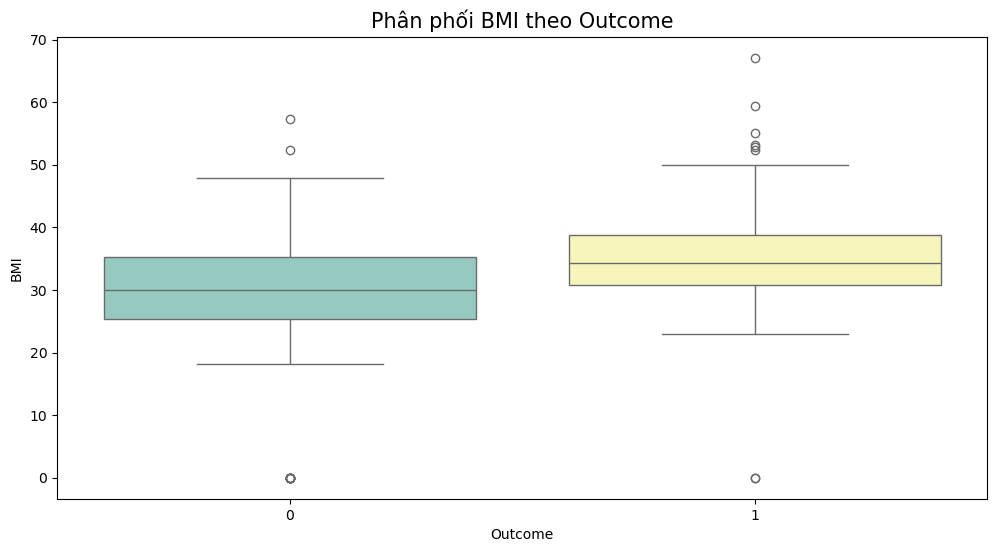

In [10]:
import seaborn as sns

# Case 1: Barplot cơ bản
plt.figure(figsize=(12,6))
data = diabetes_sorted[0:10]
sns.barplot(data=data, x='Age', y='Glucose', palette="Set2")
plt.title('Top 10 bệnh nhân có chỉ số Glucose cao nhất', fontsize=15)
plt.show()

# Case 2: So sánh Glucose và BMI theo Outcome (0 = không bệnh, 1 = bệnh)
plt.figure(figsize=(12,6))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data, palette="Set1")
plt.title("Phân phối Glucose theo Outcome", fontsize=15)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Outcome", y="BMI", data=diabetes_data, palette="Set3")
plt.title("Phân phối BMI theo Outcome", fontsize=15)
plt.show()


Nhận xét biểu đồ thể hiện top 10 bệnh nhân có chỉ số Glucose cao nhất, được sắp xếp và gắn nhãn theo độ tuổi. Nhóm tuổi từ 22 đến 62 đều có chỉ số Glucose rất cao, vượt ngưỡng 125 mg/dL. Đặc biệt, bệnh nhân 62 tuổi có chỉ số cao nhất (khoảng 200 mg/dL), tiếp theo là bệnh nhân 57 tuổi (khoảng 175 mg/dL). Điều này cho thấy chỉ số Glucose có xu hướng tăng cao ở nhóm bệnh nhân lớn tuổi hơn trong top 10 này, nhưng vẫn có những trường hợp trẻ tuổi (22, 28 tuổi) cũng nằm trong nhóm có mức Glucose cao bất thường.

Nhận xét iểu đồ boxplot so sánh phân phối chỉ số Glucose giữa hai nhóm Outcome. Nhóm Outcome = 1 (có bệnh) có chỉ số Glucose trung bình cao hơn rõ rệt so với nhóm Outcome = 0 (không có bệnh). Phân vị thấp nhất (đáy hộp) của nhóm có bệnh cũng cao hơn đáng kể so với phân vị cao nhất (đỉnh hộp) của nhóm không bệnh, cho thấy Glucose là một chỉ số phân biệt rất mạnh và có giá trị dự đoán cao giữa hai nhóm đối tượng.

Nhận xét biểu đồ boxplot so sánh phân phối chỉ số BMI giữa hai nhóm Outcome. Nhóm Outcome = 1 (có bệnh) có chỉ số BMI trung vị cao hơn nhóm Outcome = 0 (không bệnh). Phạm vi phân bố BMI của nhóm có bệnh cũng rộng hơn và nằm ở vị trí cao hơn, cho thấy xu hướng những người có BMI cao sẽ có nguy cơ mắc bệnh cao hơn. Tuy nhiên, sự khác biệt giữa hai nhóm không quá lớn như chỉ số Glucose.

# Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị.